In [27]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data = pd.read_csv('/content/drive/MyDrive/Colab Datasets/heart_disease.csv')
data.head(10)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [30]:
# Observe and analyse the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB
None


In [31]:
# Checking for NULL spaces
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [32]:
data["Ca"].replace(to_replace = np.nan, value = 0,inplace = True)
data["Thal"].replace(to_replace = np.nan, value = "normal",inplace = True)
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

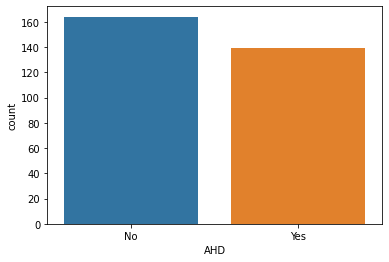

In [33]:
# binary predictor for yes and no
sns.countplot(x="AHD", data=data)

In [34]:
data = data.replace({'AHD':{'Yes': 1,'No': 0}})
data = data.replace({'ChestPain':{'typical': 0,'nontypical': 1,'nonanginal': 2,'asymptomatic': 3}})
data = data.replace({'Thal':{'normal': 1,'fixed': 2,'reversable': 3}})
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,2,0
2,67,1,3,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,3,120,229,0,2,129,1,2.6,2,2.0,3,1
4,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,1,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,0,110,264,0,0,132,0,1.2,2,0.0,3,1
300,68,1,3,144,193,1,0,141,0,3.4,2,2.0,3,1
301,57,1,3,130,131,0,0,115,1,1.2,2,1.0,3,1
302,57,0,1,130,236,0,2,174,0,0.0,2,1.0,1,1


(14.5, -0.5)

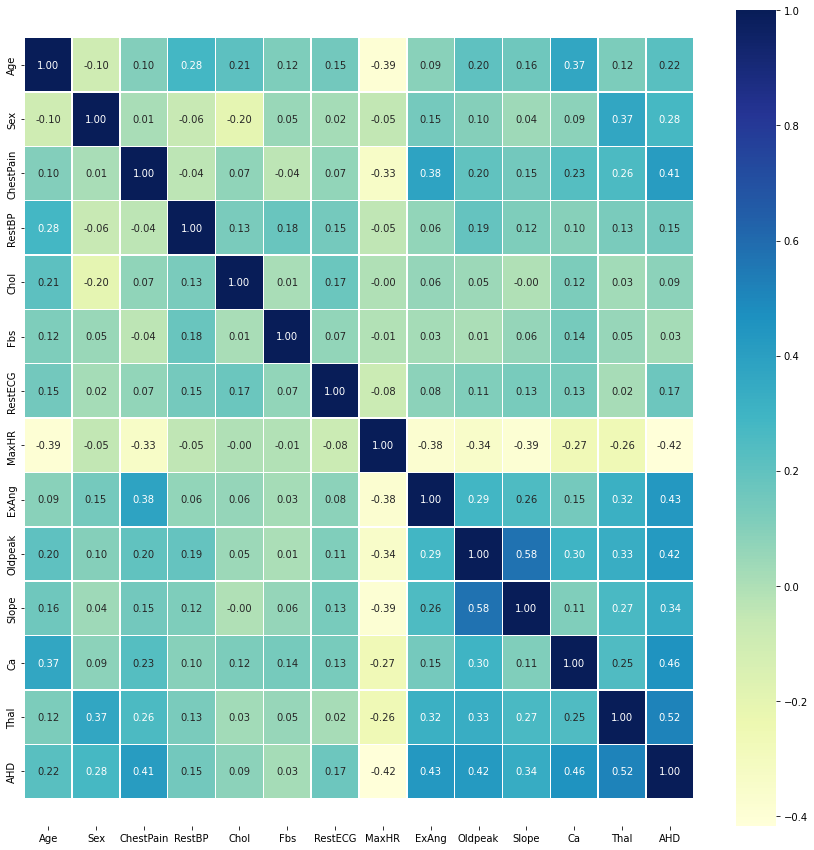

In [35]:
# Determine the correlation between the variables
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

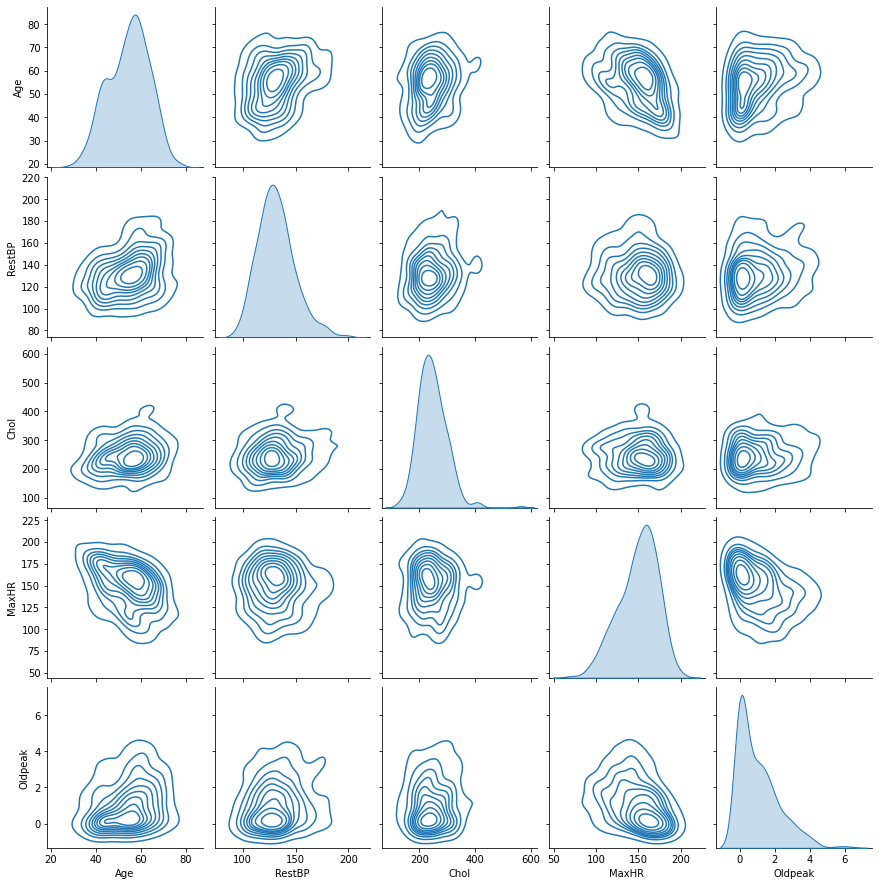

In [36]:
subData = data[['Age','RestBP','Chol','MaxHR','Oldpeak']]
sns.pairplot(subData,kind="kde")

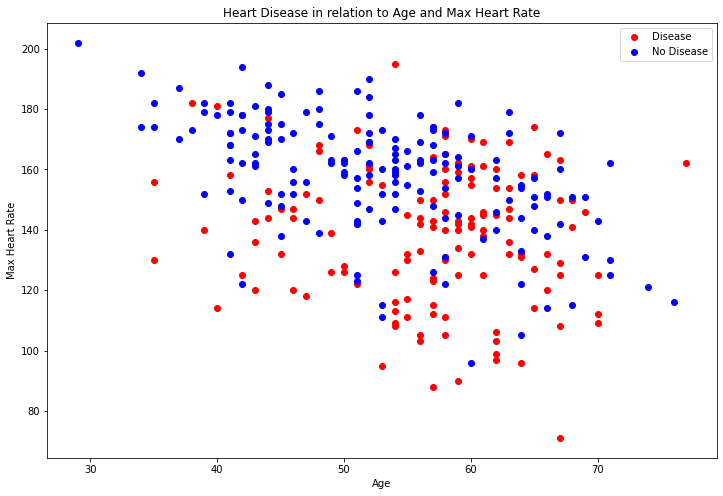

In [37]:
# Relationship between Heart Disease and Max heart rate & Age in scatter plot
plt.figure(figsize=(12, 8))

plt.scatter(data.Age[data.AHD==1],data.MaxHR[data.AHD==1],c="r")
plt.scatter(data.Age[data.AHD==0],data.MaxHR[data.AHD==0],c="b")

plt.title("Heart Disease in relation to Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [38]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Age : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
Sex : [1 0]
ChestPain : [0 3 2 1]
RestBP : [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
Chol : [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
 262 215 228 193 271 210 327 149 295 306 178 237 218 242 319 166 180 311
 278 342 169 187 157 176 241 1

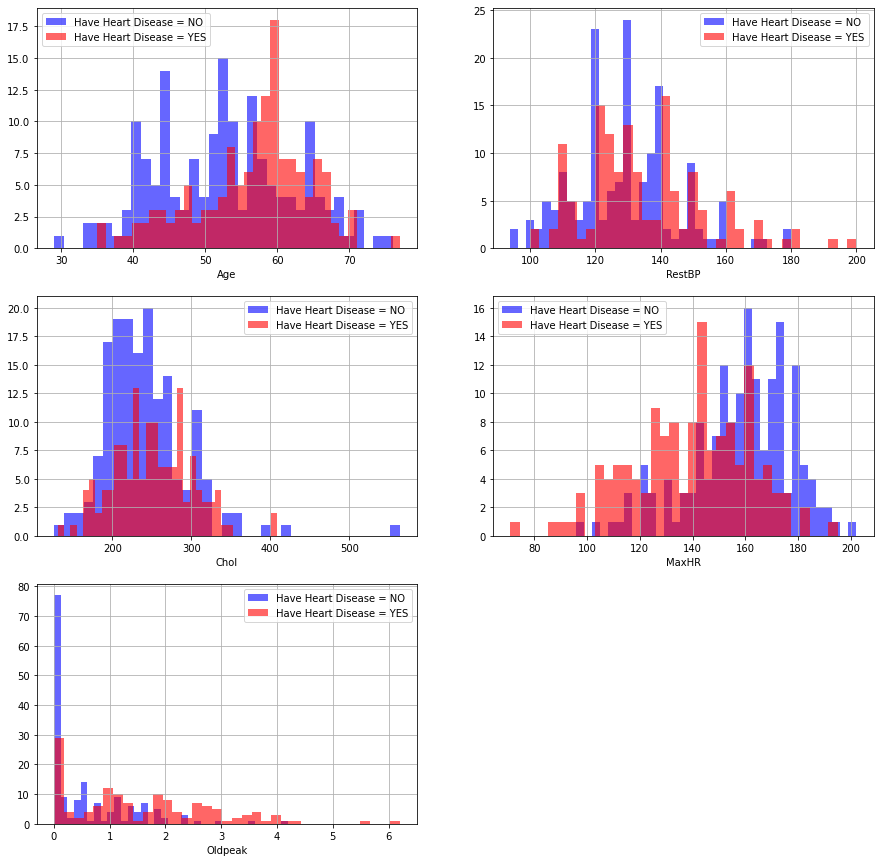

In [39]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["AHD"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["AHD"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Conclusions from the plot :
* trestbps: resting blood pressure of anything above 130-140 is generally of concern
* chol: greater than 200 is a concern.
* thalach: People with maximum of over 140 are more likely to have heart disease.
* The old peak of exercise-induced ST depression vs rest concludes heart stress during exercise. An unhealthy heart will be stressing more.

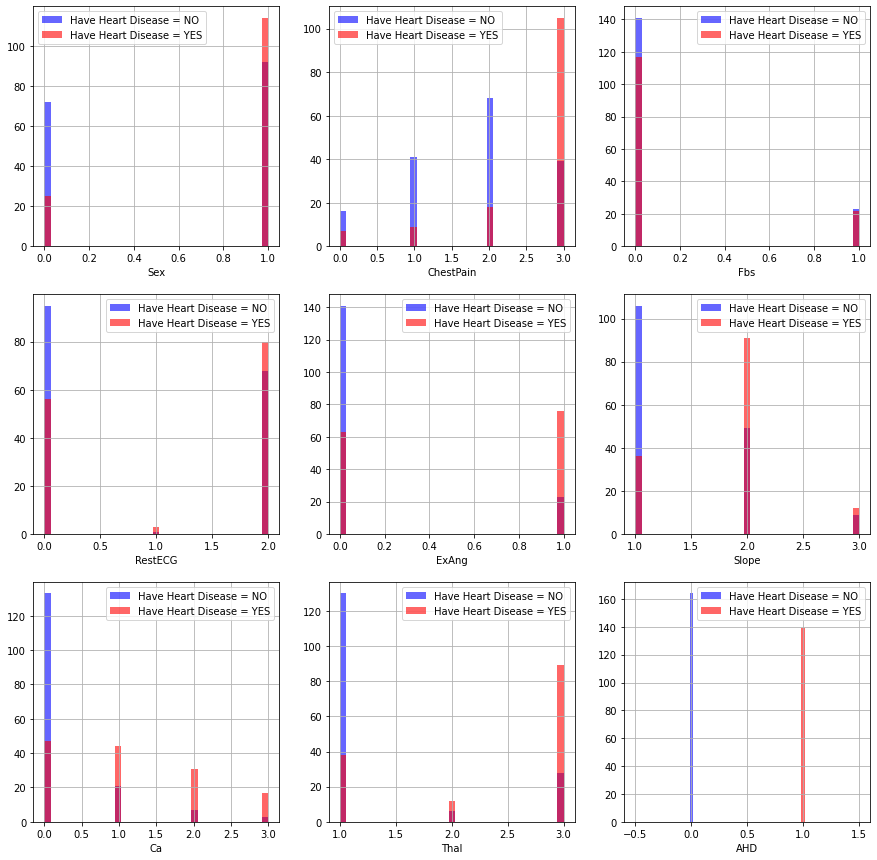

In [40]:

plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["AHD"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["AHD"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Conclusions from the plot :
* cp (Chest pain): People with cp of 1, 2 & 3 are more likely to have heart disease than people with cp of 0.
* restecg (resting EKG results): People with a value of 1 are reporting to an abnormal heart rhythm ranging from mild symptoms to severe problems (More likely yo heart disease).
* exang (exercise-induced angina): people with a value of 0 who are considered as No to exercise-induced angina have more heart disease than people with a value of 1 who are considered as Yes to exercise-induced angina.
* slope (Slope of the ST segment [peak exercise]): People with a slope value of 2 are Downsloping meaning signs of an unhealthy heart are more likely to have heart disease than people with a slope of 0  that is Upsloping meaning best heart rate with exercise or a slope of 1 as Flat Sloping meaning minimal change of typical healthy heart.
* ca (number of major vessels (0-3) stained by fluoroscopy): More the movement of blood is for betterment. So people with ca equal to 0 are more likely to have heart disease.
* thal (thallium stress result): People with a thal value of 2 are defect corrected that is once was a defect but now it is fine are more likely to have heart disease.

## Data Model preparation

In [41]:
# Split the data as 80% training and 20% testing
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [42]:
# Dimension of train and test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


In [43]:
# Train the machine learning model and generate the classification report of logistic regression
reg=LogisticRegression()
reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [44]:
print(reg.predict(x_test[0].reshape(1,-1)))
reg.predict(x_test[0:10])

[0]


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [45]:
pred=reg.predict(x_test)
print(pred)
score=reg.score(x_test, y_test)
print(score)

[0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1]
0.7868852459016393


[[30  7]
 [ 6 18]]


Text(0.5, 1.0, 'Accuracy Score: 0.7868852459016393')

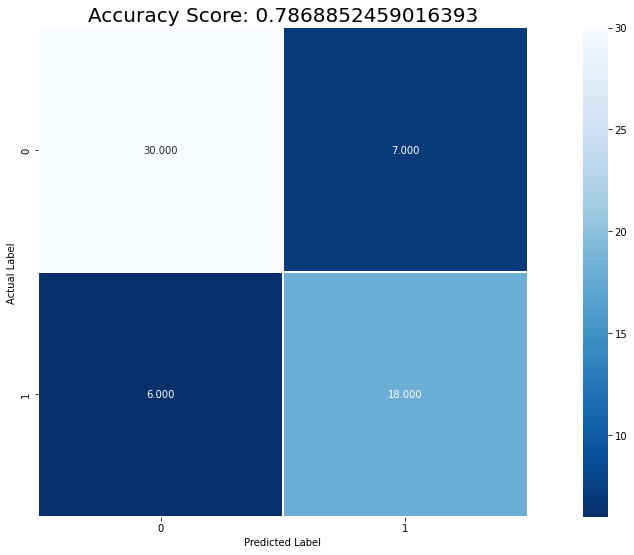

In [46]:
# Predict the accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
print(cm)
plt.figure(figsize=(20,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title=f"Accuracy Score: {score}"
plt.title(all_sample_title, size=20)